## Нейронная сеть для распознавания рукописных цифр MNIST

Установка и импорт библиотек

In [ ]:
# !pip install tensorflow==2.16.1

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


### Загрузка данных

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
#размерность
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}\n")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28), y_train: (60000,)

x_test: (10000, 28, 28), y_test: (10000,)


### Нормализация данных

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [15]:
# One-hot encoding
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

### Примеры данных

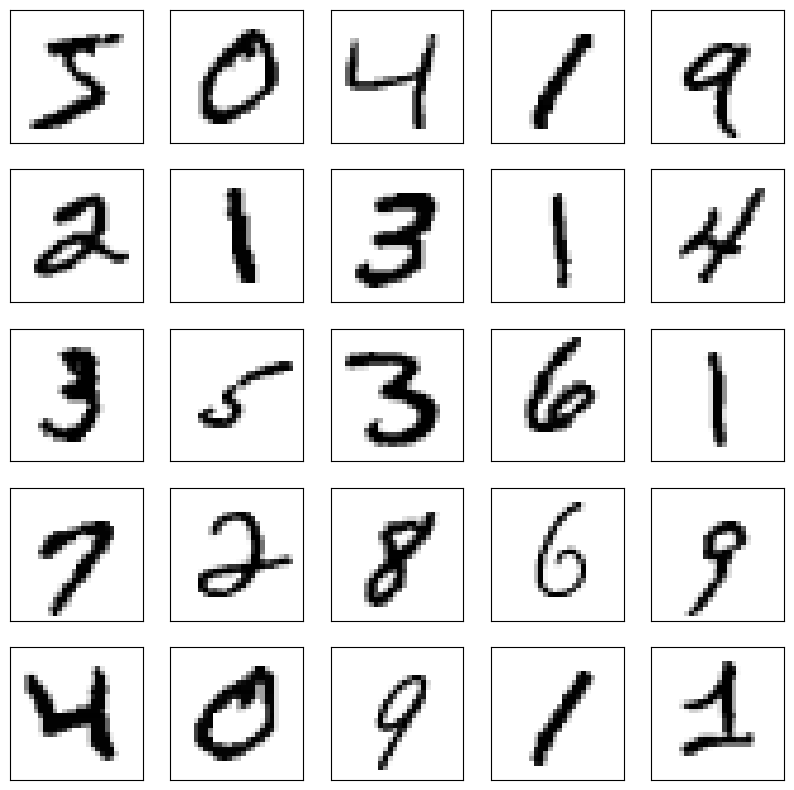

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

### Построение модели

In [17]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

### Компилируем и обучаем модель

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9802 - val_loss: 0.0705
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0293 - val_accuracy: 0.9785 - val_loss: 0.0780
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9800 - val_loss: 0.0762
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9750 - val_loss: 0.0907
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0149 - val_accuracy: 0.9803 - val_loss: 0.0804
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0135 - val_accuracy: 0.9800 - val_loss: 0.0897
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 0.9815 - val_loss: 0.0822
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9975 - loss: 0.0092 - 

### Оценка точности на тестовых данных

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9799 - loss: 0.1021
Test accuracy: 0.9799000024795532


In [27]:
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [37]:
import random

random_idx = random.randint(0, len(x_test) - 1)

pred = model.predict(x_test[random_idx:random_idx+1])
predicted_class = np.argmax(pred)
true_label = np.argmax(y_test_cat[random_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


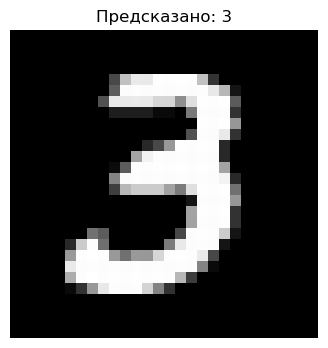

Предсказанная цифра: 3
Уверенность: 100.00%


In [34]:
plt.figure(figsize=(6, 4))
plt.imshow(x_test[random_idx], cmap='gray')
plt.title(f"Предсказано: {predicted_class}")
plt.axis('off')
plt.show()

print(f"Предсказанная цифра: {predicted_class}")
print(f"Уверенность: {np.max(pred):.2%}")

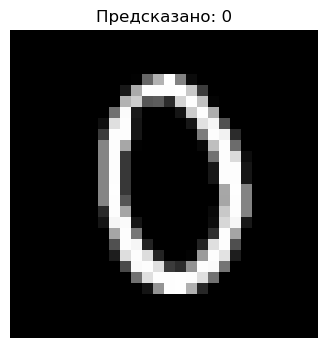

Предсказанная цифра: 0
Уверенность: 100.00%


In [32]:
plt.figure(figsize=(6, 4))
plt.imshow(x_test[random_idx], cmap='gray')
plt.title(f"Предсказано: {predicted_class}")
plt.axis('off')
plt.show()

print(f"Предсказанная цифра: {predicted_class}")
print(f"Уверенность: {np.max(pred):.2%}")

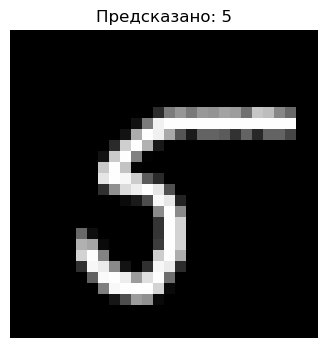

Предсказанная цифра: 5
Уверенность: 100.00%


In [38]:
plt.figure(figsize=(6, 4))
plt.imshow(x_test[random_idx], cmap='gray')
plt.title(f"Предсказано: {predicted_class}")
plt.axis('off')
plt.show()

print(f"Предсказанная цифра: {predicted_class}")
print(f"Уверенность: {np.max(pred):.2%}")

Сохраняем модель

In [39]:
#model.save('mnist_model.h5')